Este link contém quatro datasets distintos, cada um com uma dimensionalidade específica (cada coluna é uma feature). Cada dataset contém um número de clusters específico, bem como uma localização específica do centro do cluster. Sua tarefa é encontrar o número de clusters e essa localização, utilizando diferentes abordagens de clustering (p.ex., k-means, hierárquico e dbscan), bem como diferentes métricas de comparação (elbow method, coeficiente de silhueta). Apresente o roteiro com gráficos que justifiquem sua decisão final para cada dataset, bem como os códigos.

...

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns
from sklearn.cluster import DBSCAN


In [84]:
df1 = pd.read_csv('Dados/dataset1.txt', header=None, sep='\s+')
df2 = pd.read_csv('Dados/dataset2.txt', header=None, sep='\s+')
df3 = pd.read_csv('Dados/dataset3.txt', header=None, sep='\s+')
df4 = pd.read_csv('Dados/dataset4.txt', header=None, sep='\s+')

scaler = StandardScaler()
X1 = scaler.fit_transform(df1)
X2 = scaler.fit_transform(df2)
X3 = scaler.fit_transform(df3)
X4 = scaler.fit_transform(df4)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\joaop\AppData\Local\Temp\ipykernel_17276\4221799672.py:1: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv('Dados/dataset1.txt', header=None, sep='\s+')
C:\Users\joaop\AppData\Local\Temp\ipykernel_17276\4221799672.py:2: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('Dados/dataset2.txt', header=None, sep='\s+')
C:\Users\joaop\AppData\Local\Temp\ipykernel_17276\4221799672.py:3: SyntaxWarning: invalid escape sequence '\s'
  df3 = pd.read_csv('Dados/dataset3.txt', header=None, sep='\s+')
C:\Users\joaop\AppData\Local\Temp\ipykernel_17276\4221799672.py:4: Sy

### The first analisys will be using kMeans with silhouette score

In [85]:
def apply_kmeans(X, n_clusters_range, dataset_name):
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        silhouette_avg = silhouette_score(X, labels)
        print(f'Dataset: {dataset_name}, Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}')
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
        plt.title(f'{dataset_name} - K-Means Clustering with {n_clusters} clusters')
        plt.show()


Dataset: Dataset 1, Number of clusters: 2, Silhouette Score: 0.7354853119091309


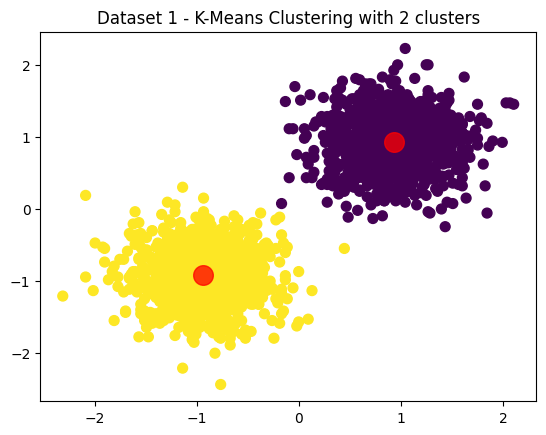

Dataset: Dataset 1, Number of clusters: 3, Silhouette Score: 0.4109962350120574


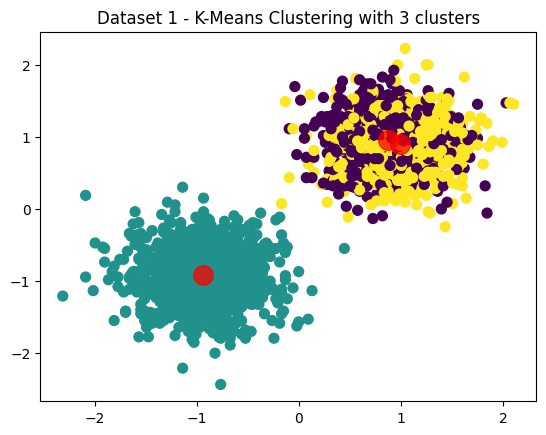

Dataset: Dataset 1, Number of clusters: 4, Silhouette Score: 0.08980523948762968


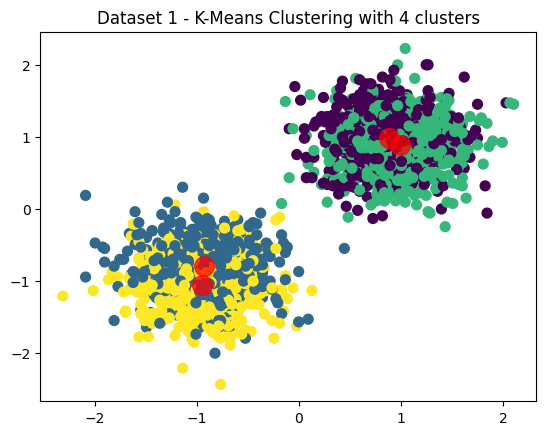

In [86]:
apply_kmeans(X1, range(2, 5), 'Dataset 1')

Dataset: Dataset 2, Number of clusters: 2, Silhouette Score: 0.423756916339722


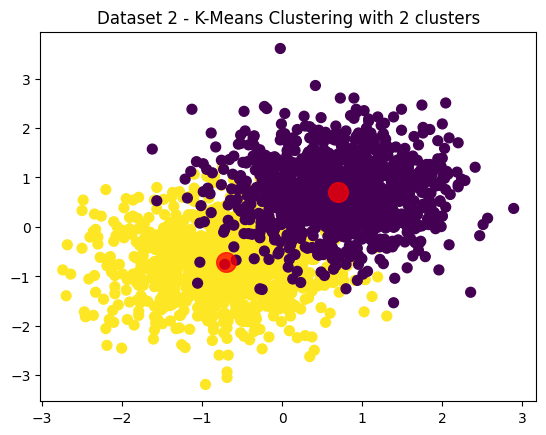

Dataset: Dataset 2, Number of clusters: 3, Silhouette Score: 0.21818461949402068


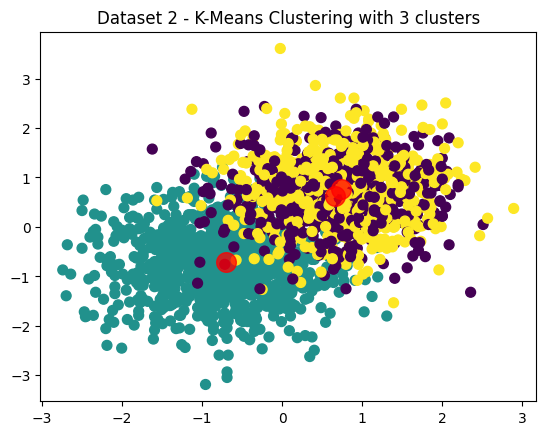

Dataset: Dataset 2, Number of clusters: 4, Silhouette Score: 0.013850127925419408


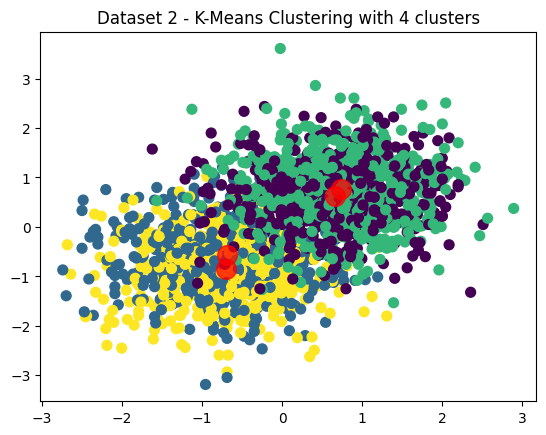

Dataset: Dataset 2, Number of clusters: 5, Silhouette Score: 0.013176017372440282


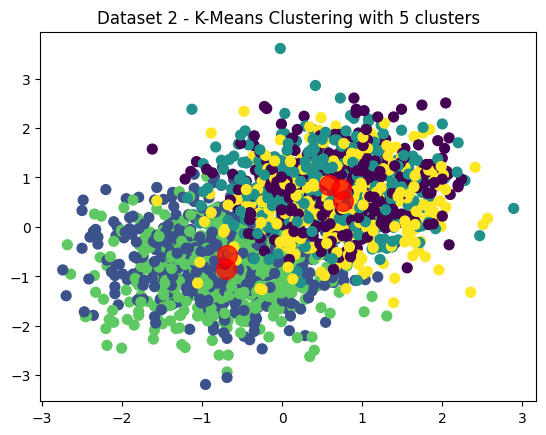

Dataset: Dataset 2, Number of clusters: 6, Silhouette Score: 0.012638523286940411


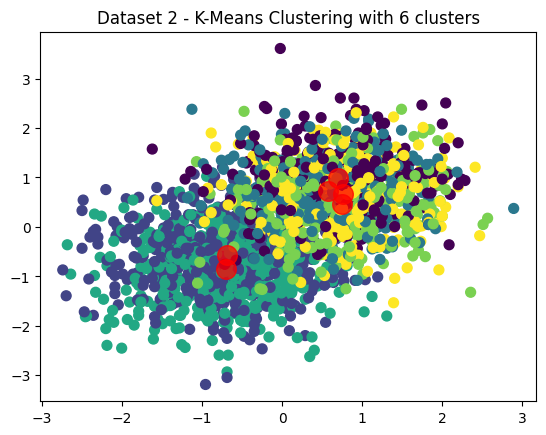

Dataset: Dataset 2, Number of clusters: 7, Silhouette Score: 0.011827879316927352


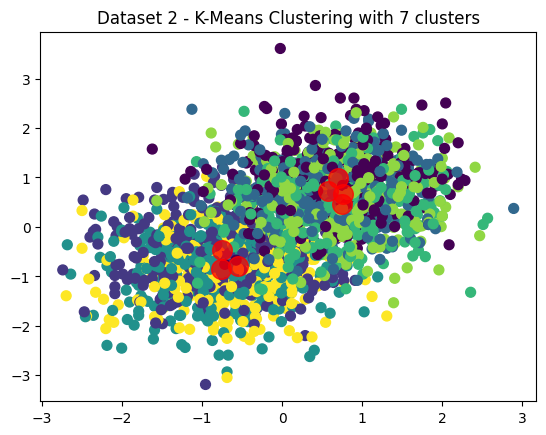

Dataset: Dataset 2, Number of clusters: 8, Silhouette Score: 0.012404792709236077


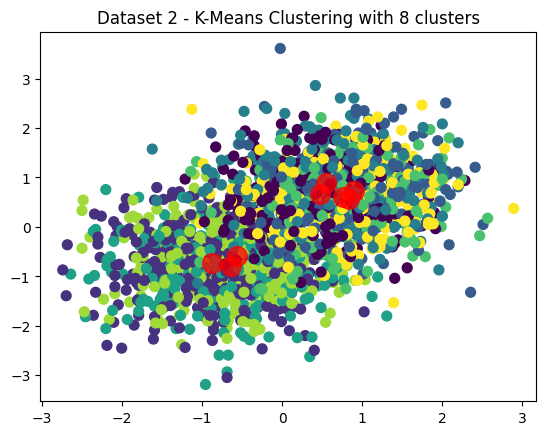

Dataset: Dataset 2, Number of clusters: 9, Silhouette Score: 0.012491854761926335


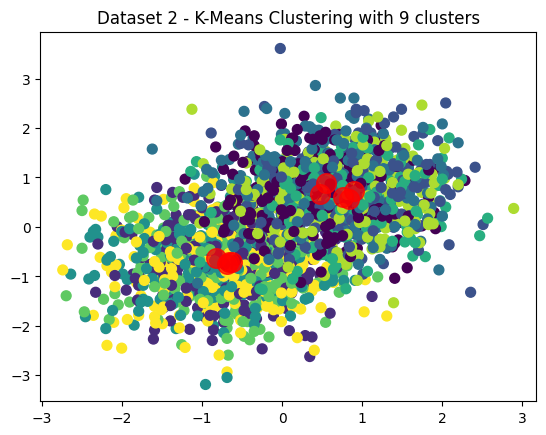

In [87]:
apply_kmeans(X2, range(2, 10), 'Dataset 2')

Dataset: Dataset 3, Number of clusters: 2, Silhouette Score: 0.26741891166962595


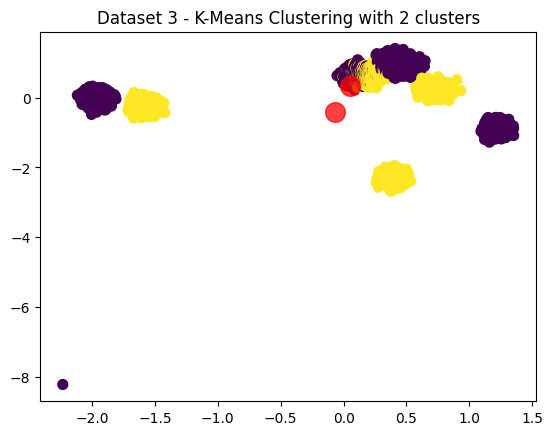

Dataset: Dataset 3, Number of clusters: 3, Silhouette Score: 0.3575587967760553


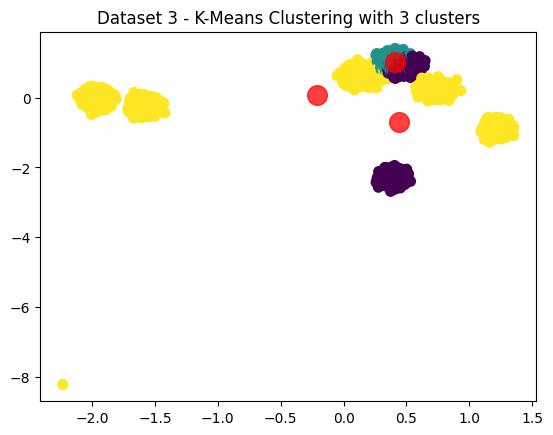

Dataset: Dataset 3, Number of clusters: 4, Silhouette Score: 0.46099366982012435


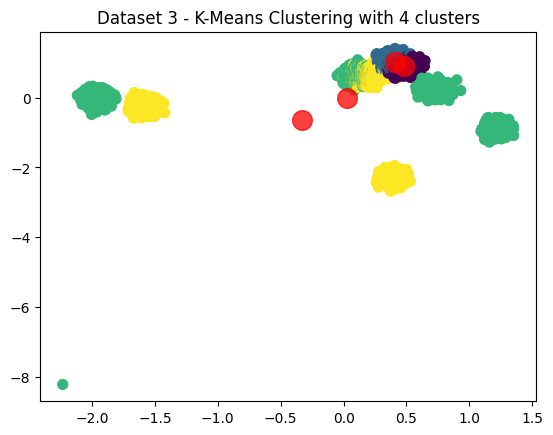

Dataset: Dataset 3, Number of clusters: 5, Silhouette Score: 0.5511872016458673


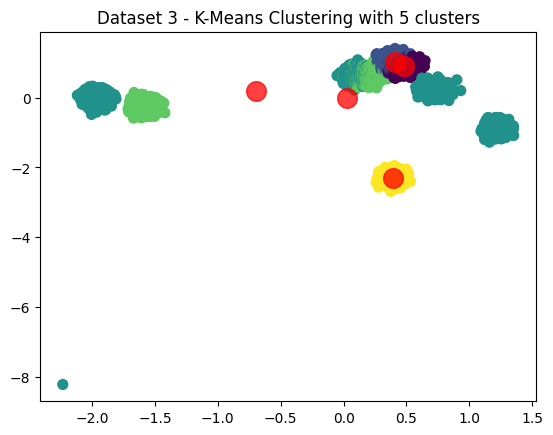

Dataset: Dataset 3, Number of clusters: 6, Silhouette Score: 0.6637711089007394


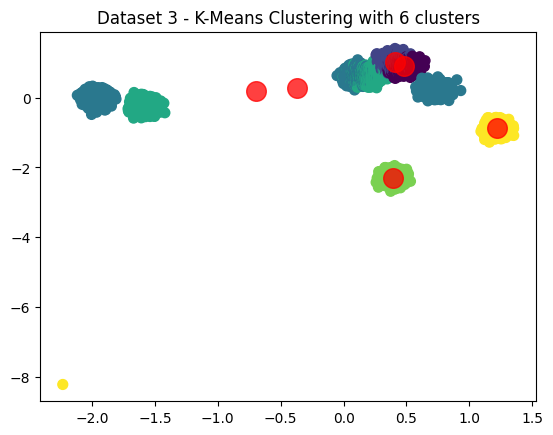

Dataset: Dataset 3, Number of clusters: 7, Silhouette Score: 0.7236480703738349


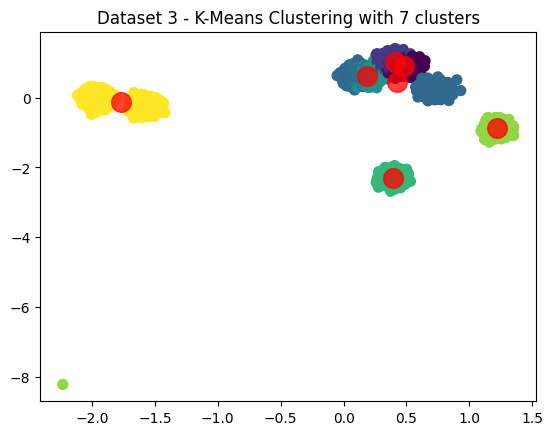

Dataset: Dataset 3, Number of clusters: 8, Silhouette Score: 0.812837592057029


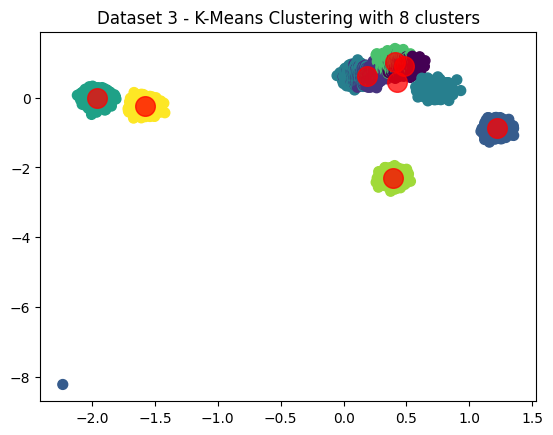

Dataset: Dataset 3, Number of clusters: 9, Silhouette Score: 0.8998059818013091


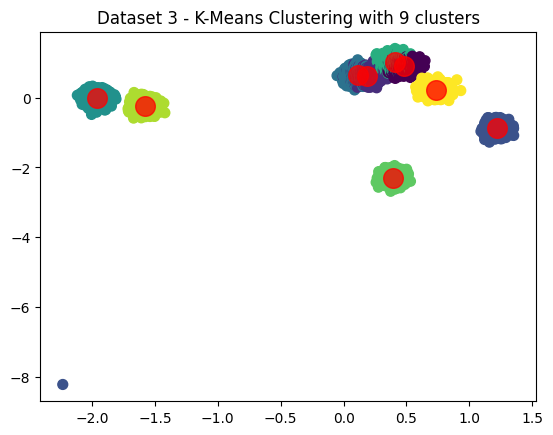

Dataset: Dataset 3, Number of clusters: 10, Silhouette Score: 0.9000222187155206


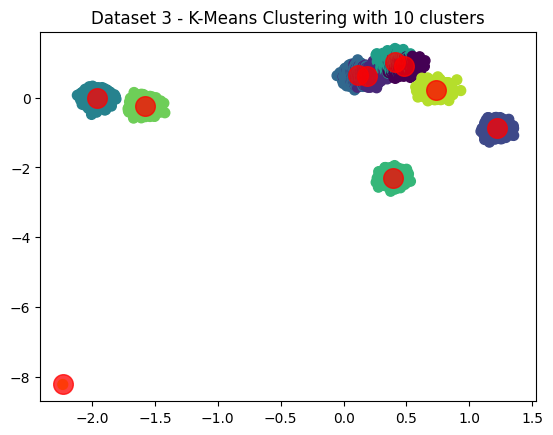

Dataset: Dataset 3, Number of clusters: 11, Silhouette Score: 0.8095993135141476


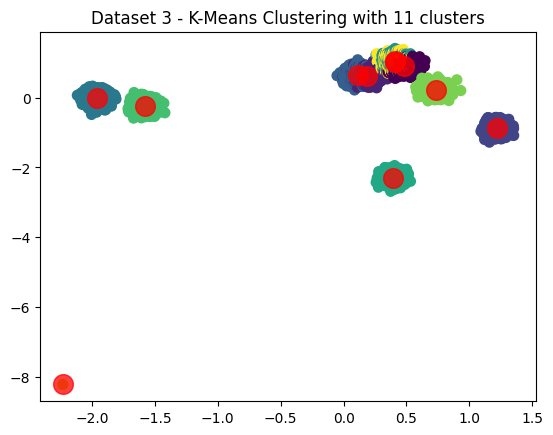

In [88]:
apply_kmeans(X3, range(2, 12), 'Dataset 3')

Dataset: Dataset 4, Number of clusters: 2, Silhouette Score: 0.12488801051688687


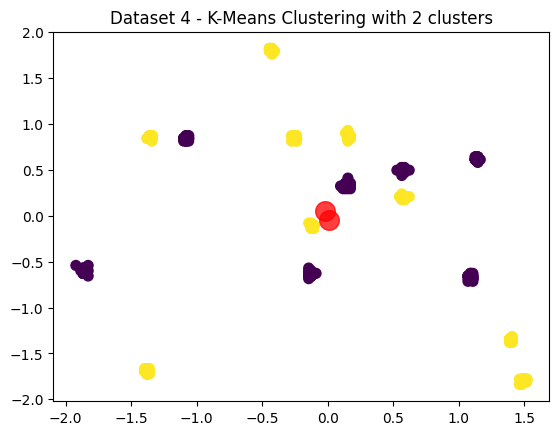

Dataset: Dataset 4, Number of clusters: 3, Silhouette Score: 0.18984069754917515


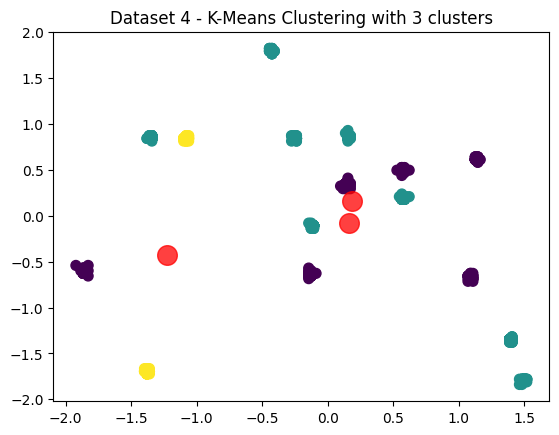

Dataset: Dataset 4, Number of clusters: 4, Silhouette Score: 0.24850018481020497


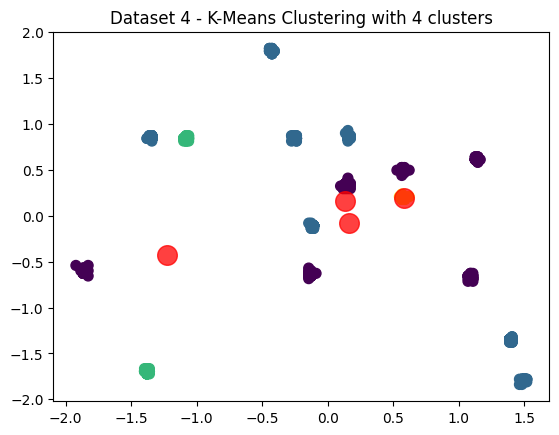

Dataset: Dataset 4, Number of clusters: 5, Silhouette Score: 0.31032331251548806


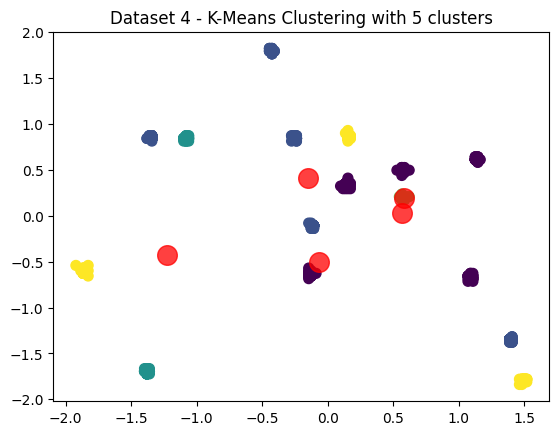

Dataset: Dataset 4, Number of clusters: 6, Silhouette Score: 0.3705394892040289


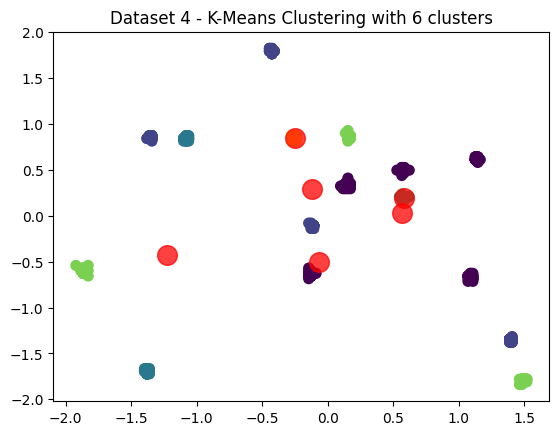

Dataset: Dataset 4, Number of clusters: 7, Silhouette Score: 0.4325346245899907


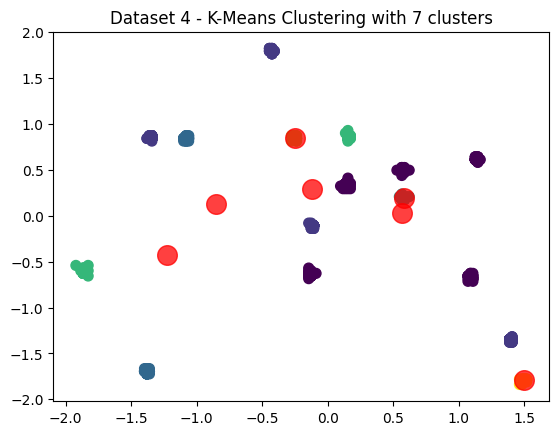

Dataset: Dataset 4, Number of clusters: 8, Silhouette Score: 0.49569145314742535


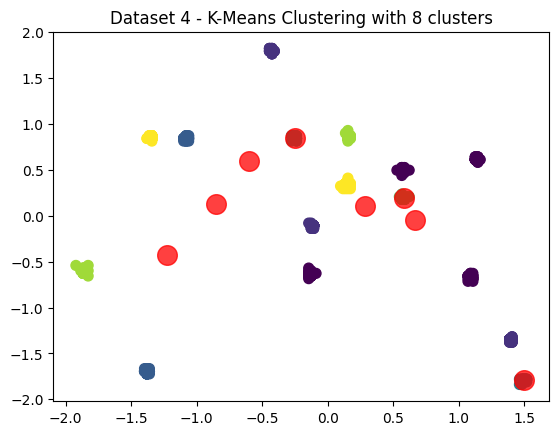

Dataset: Dataset 4, Number of clusters: 9, Silhouette Score: 0.5562426029241925


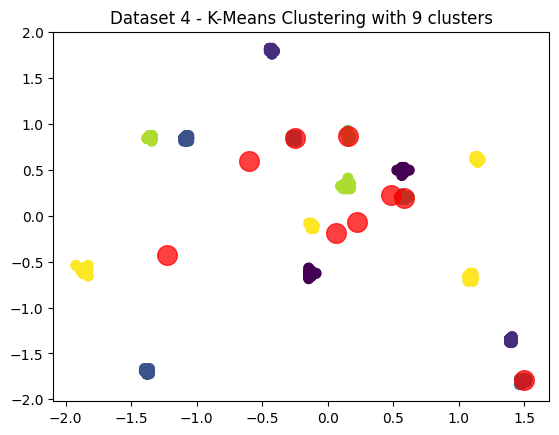

Dataset: Dataset 4, Number of clusters: 10, Silhouette Score: 0.6166912158744253


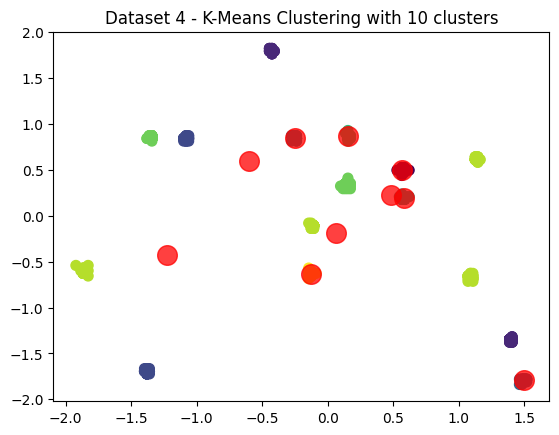

Dataset: Dataset 4, Number of clusters: 11, Silhouette Score: 0.679052415974778


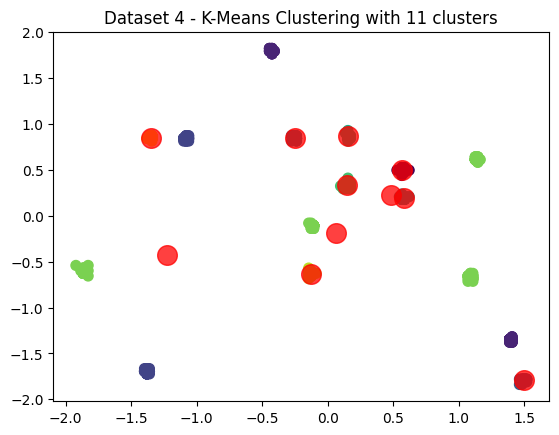

Dataset: Dataset 4, Number of clusters: 12, Silhouette Score: 0.7409611112646384


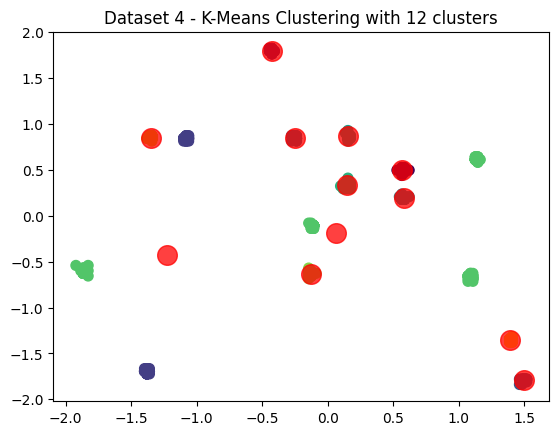

Dataset: Dataset 4, Number of clusters: 13, Silhouette Score: 0.8019298016114784


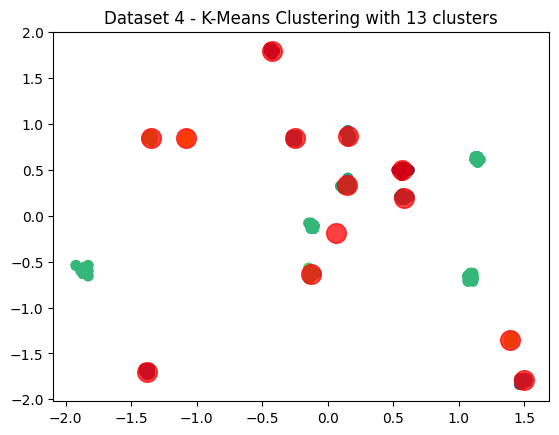

Dataset: Dataset 4, Number of clusters: 14, Silhouette Score: 0.8649260909161056


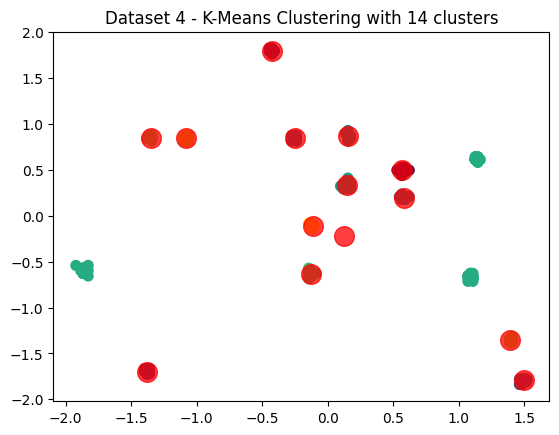

Dataset: Dataset 4, Number of clusters: 15, Silhouette Score: 0.9287299961917548


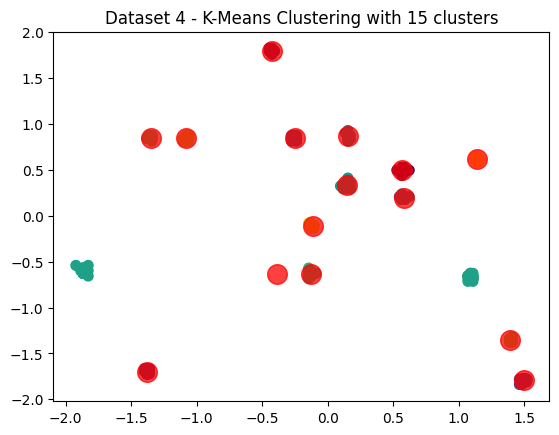

Dataset: Dataset 4, Number of clusters: 16, Silhouette Score: 0.9906016554646687


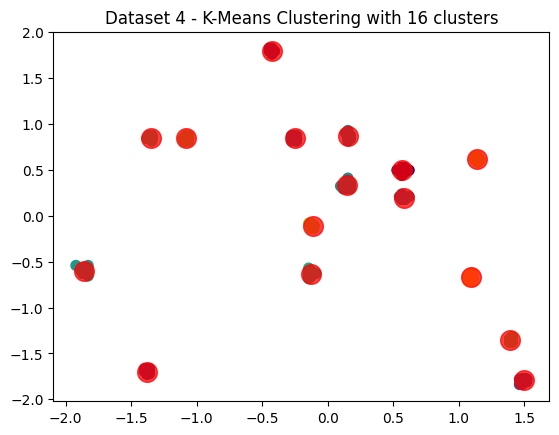

Dataset: Dataset 4, Number of clusters: 17, Silhouette Score: 0.9511977853530997


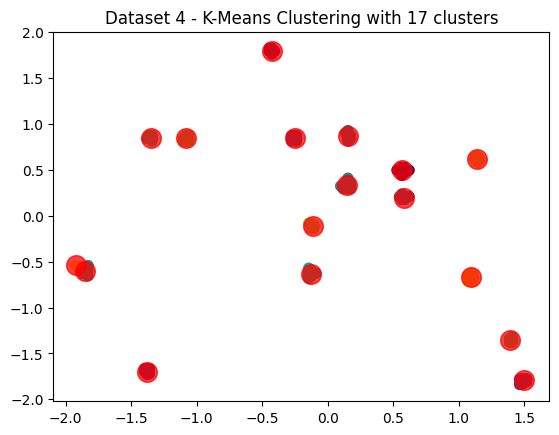

Dataset: Dataset 4, Number of clusters: 18, Silhouette Score: 0.9013187379839318


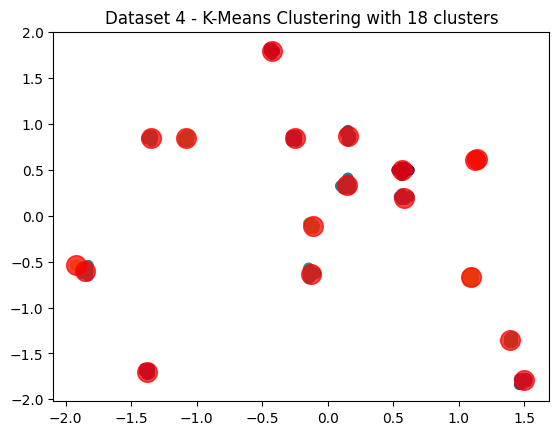

Dataset: Dataset 4, Number of clusters: 19, Silhouette Score: 0.828158422358302


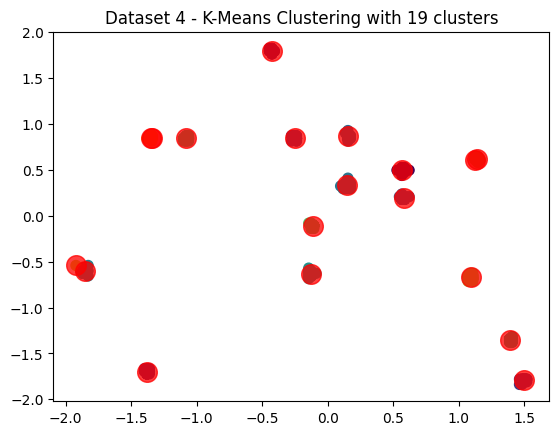

In [89]:
apply_kmeans(X4, range(2, 20), 'Dataset 4')

Results of the first method:
- Dataset 1: 2 clusters, Silhouette Score: 0.7354853119091309
- Dataset 2: 2 clusters, Silhouette Score: 0.423756916339722
- Dataset 3: 10 clusters, Silhouette Score: 0.9000222187155206
- Dataset 4: 16 clusters, Silhouette Score: 0.9906016554646687

### The second analysis will be using KMeans with the elbow method

In [90]:
def elbow_method(X, max_clusters):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)  # SSE: erro quadrático total
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.title('KMeans with Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

Elbow Method on Dataset 1


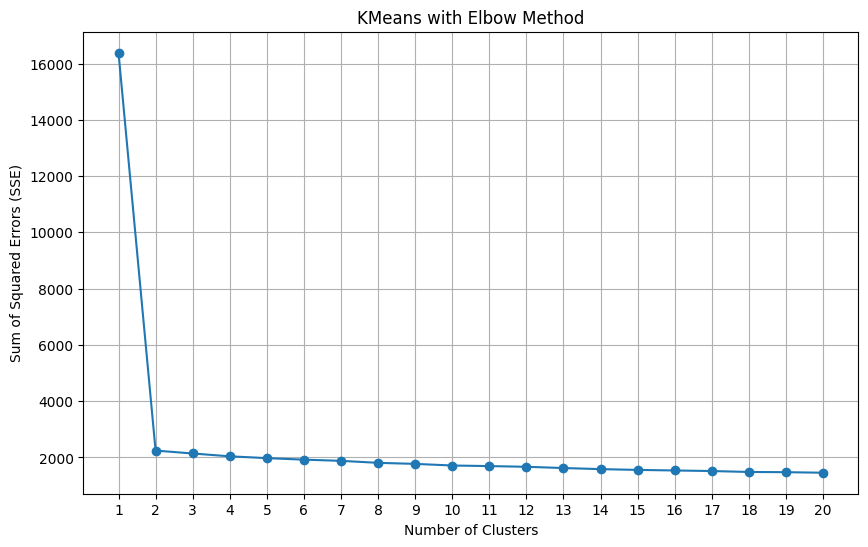

Elbow Method on Dataset 2


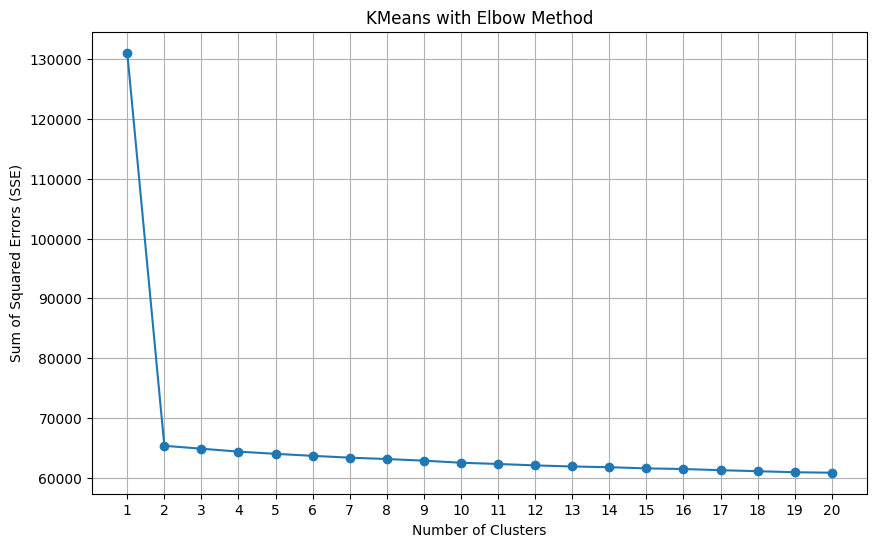

Elbow Method on Dataset 3


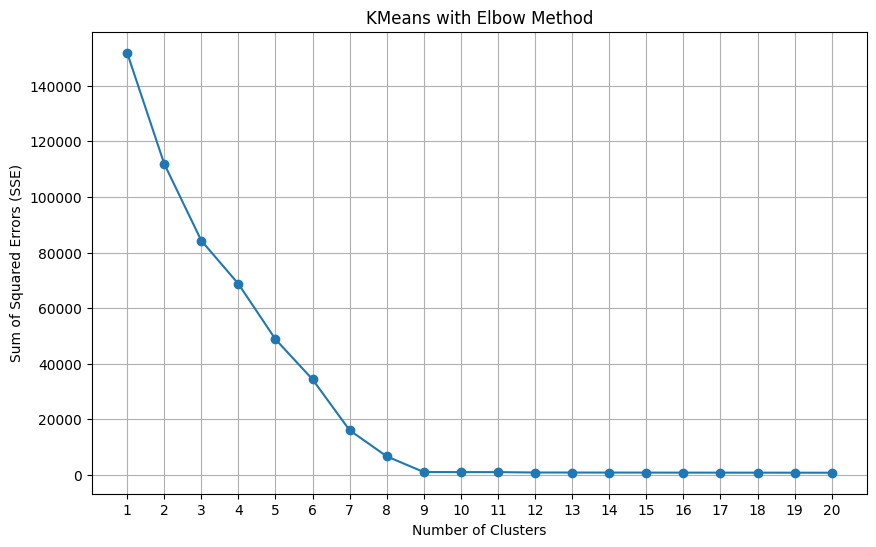

Elbow Method on Dataset 4


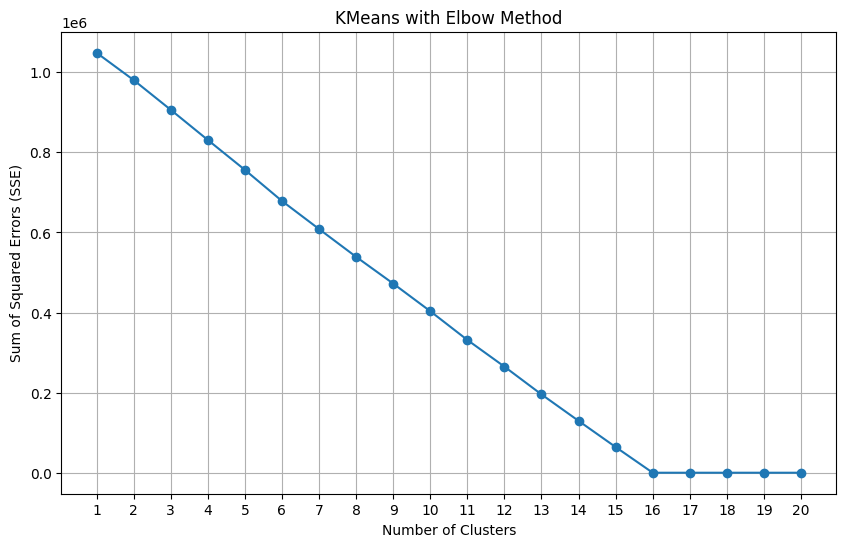

In [91]:
datasets = [X1, X2, X3, X4]
max_clusters = 20

for i, data in enumerate(datasets, start=1):
    print(f"Elbow Method on Dataset {i}")
    elbow_method(data, max_clusters)

Results of the second method:
- Dataset 1: 2 clusters
- Dataset 2: 2 clusters
- Dataset 3: 9 clusters
- Dataset 4: 16 clusters

### The third method will be the hierarchical method

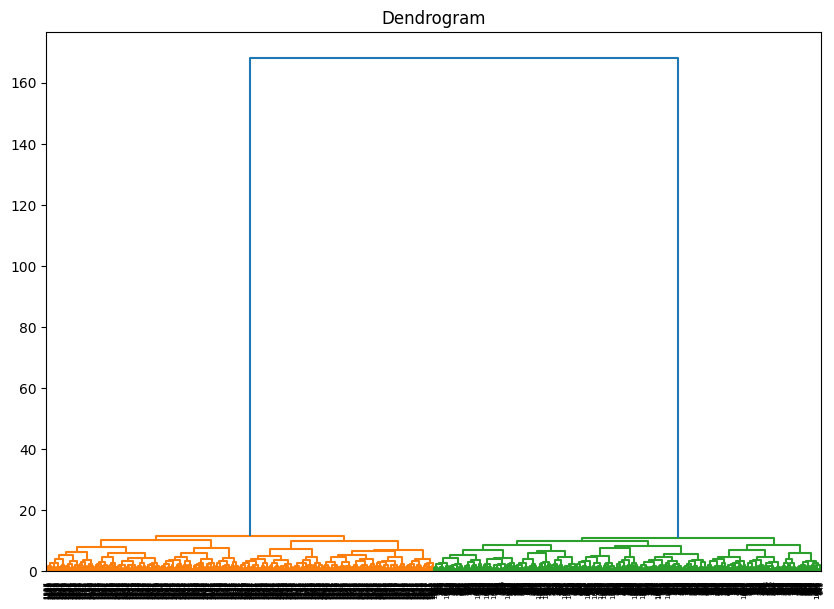

Number of clusters: 2, Silhouette Score: 0.7354853119091309


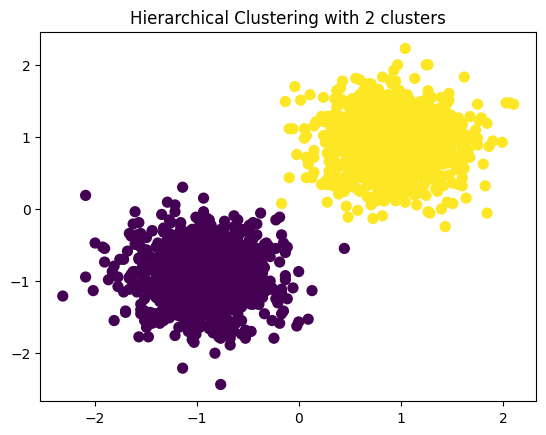

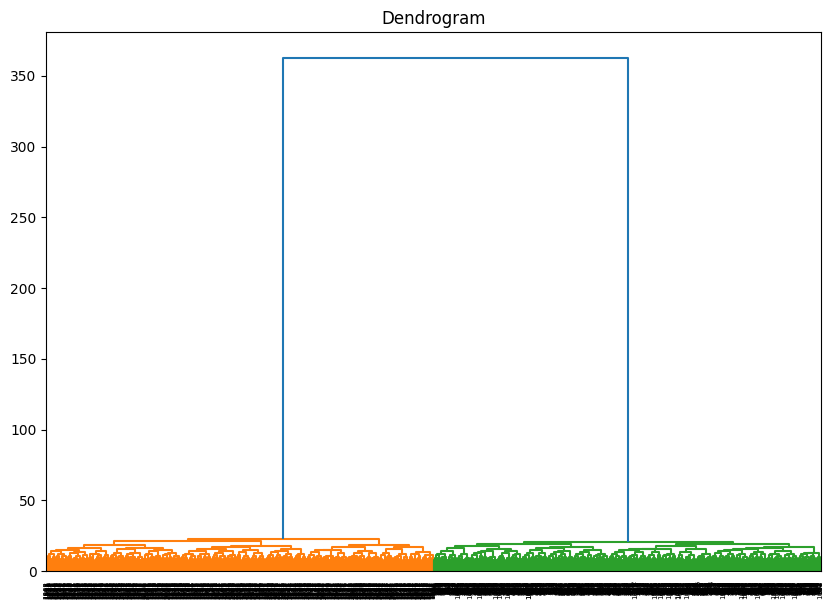

Number of clusters: 2, Silhouette Score: 0.423756916339722


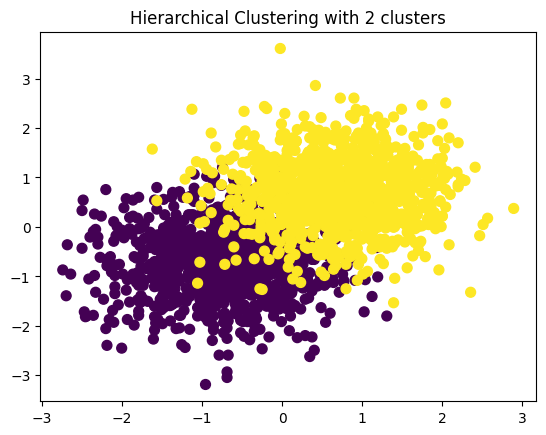

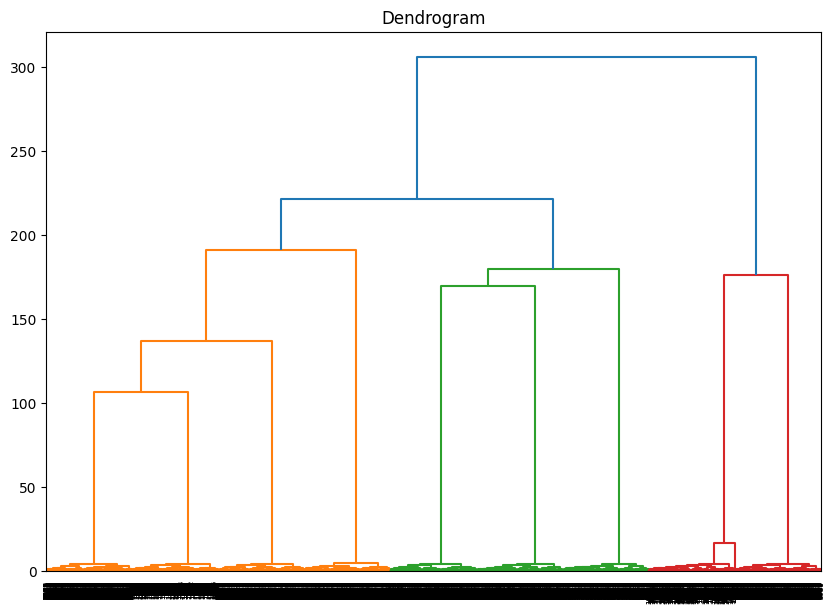

Number of clusters: 7, Silhouette Score: 0.7619677009454591


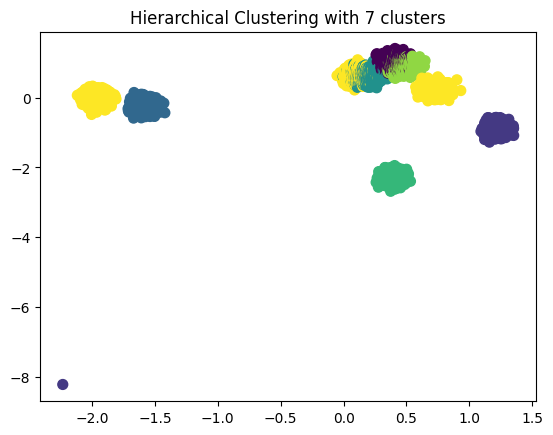

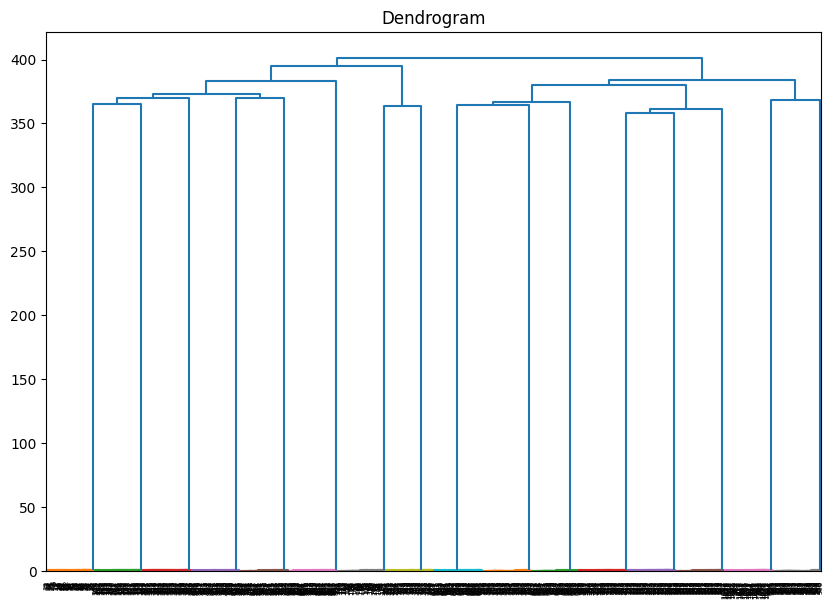

Number of clusters: 16, Silhouette Score: 0.9906016554646687


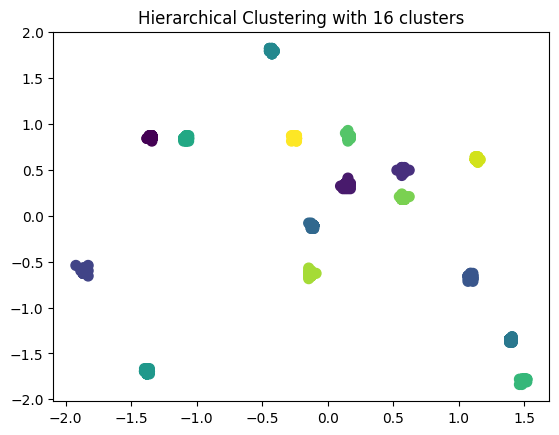

In [92]:
def apply_hierarchical(X, method='ward', distance_threshold=None):
    linked = linkage(X, method=method)
    plt.figure(figsize=(10, 7))
    
    dendrogram_data = dendrogram(linked, orientation='top', distance_sort='descending')
    plt.title('Dendrogram')
    plt.show()
    
    if distance_threshold is None:
        distances = linked[:, 2]
        distance_threshold = np.max(distances) * 0.5  # this value can be adjusted
        
    clusters = fcluster(linked, distance_threshold, criterion='distance')
    k = len(np.unique(clusters))
    silhouette_avg = silhouette_score(X, clusters)
    print(f'Number of clusters: {k}, Silhouette Score: {silhouette_avg}')
    
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
    plt.title(f'Hierarchical Clustering with {k} clusters')
    plt.show()


apply_hierarchical(X1)
apply_hierarchical(X2)
apply_hierarchical(X3)
apply_hierarchical(X4)


Results of third method:
- Dataset 1: Number of clusters: 2, Silhouette Score: 0.7354853119091309
- Dataset 2: Number of clusters: 2, Silhouette Score: 0.423756916339722
- Dataset 3: Number of clusters: 7, Silhouette Score: 0.7619677009454591
- Dataset 4: Number of clusters: 16, Silhouette Score: 0.9906016554646687

## The fourth method will be DBSCAN

eps: 0.5, Silhouette Score: -0.48959872429252904


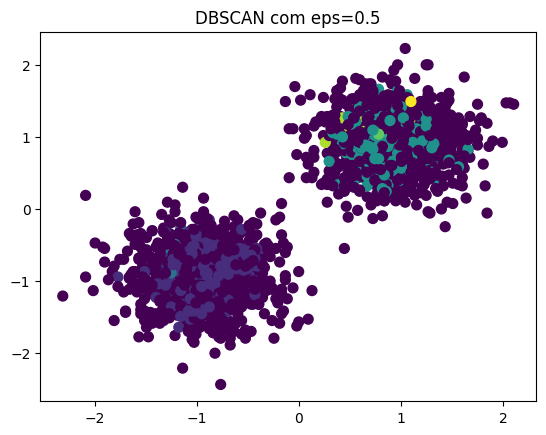

eps: 1.0, Silhouette Score: 0.6265000837400219


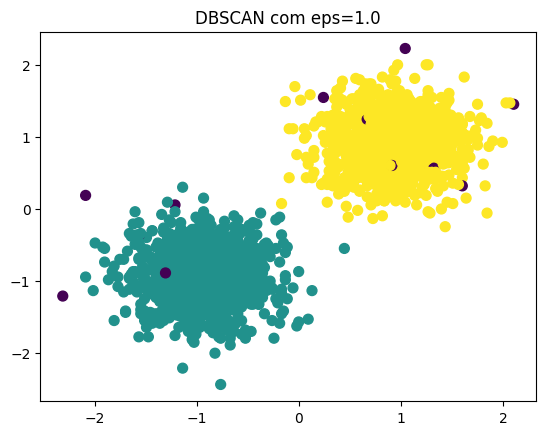

eps: 1.5, Silhouette Score: 0.7354853119091309


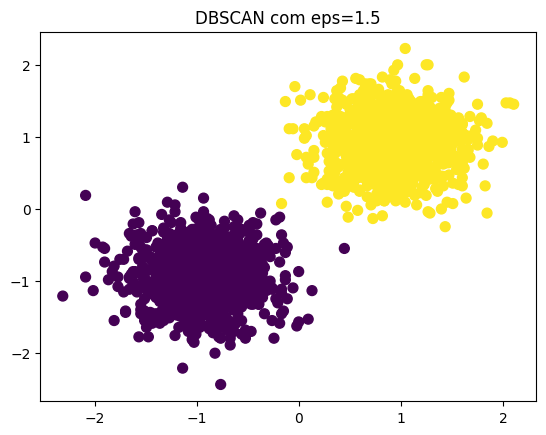

eps: 0.5, Silhouette Score: -1


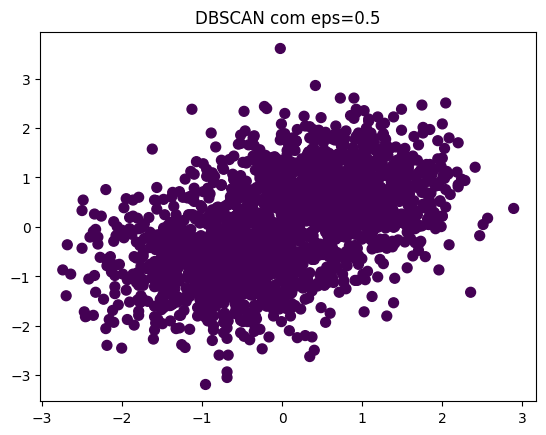

eps: 1.0, Silhouette Score: -1


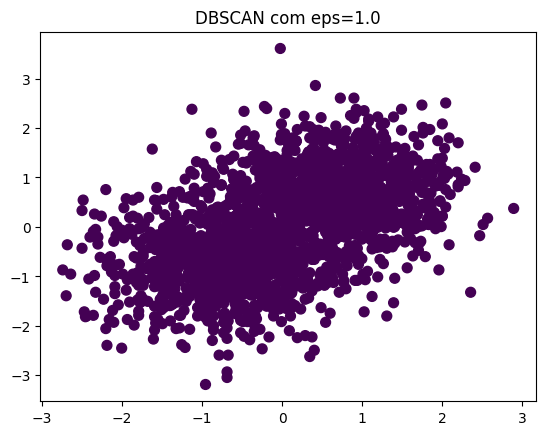

eps: 1.5, Silhouette Score: -1


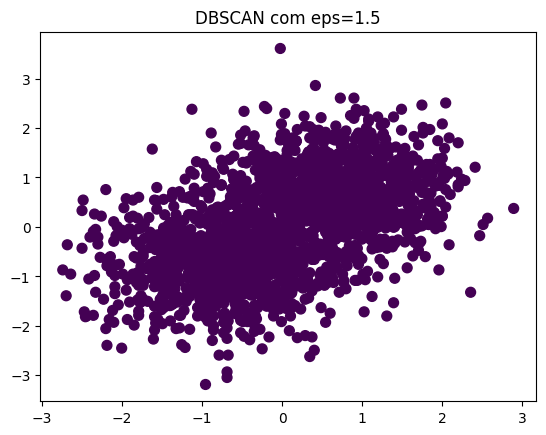

eps: 0.5, Silhouette Score: 0.9000222187155206


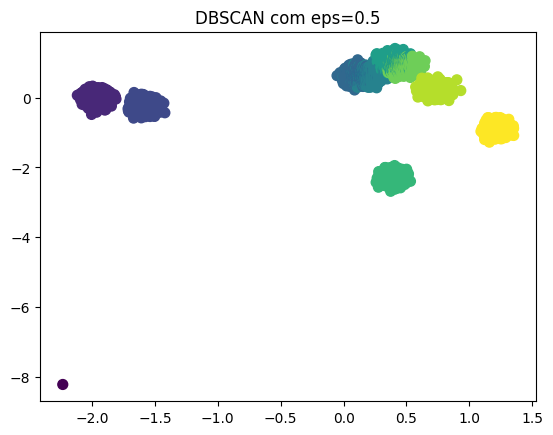

eps: 1.0, Silhouette Score: 0.9000222187155206


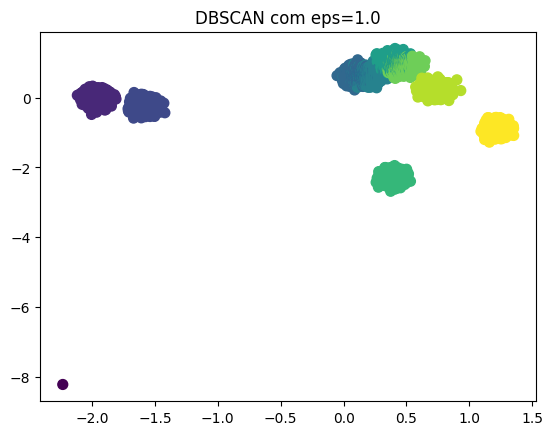

eps: 1.5, Silhouette Score: 0.9000222187155206


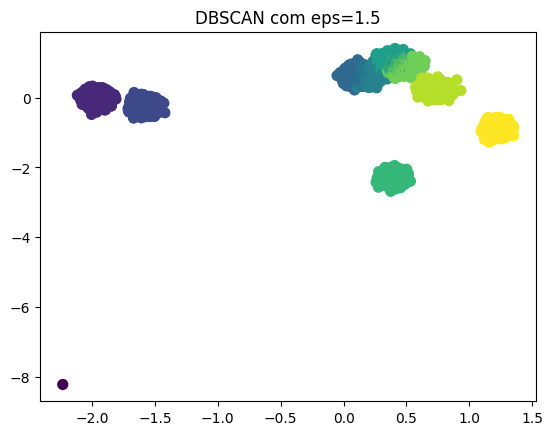

eps: 0.5, Silhouette Score: 0.767718418255591


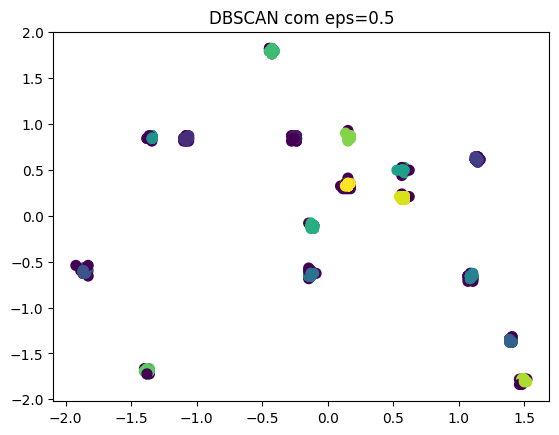

eps: 1.0, Silhouette Score: 0.9906016554646687


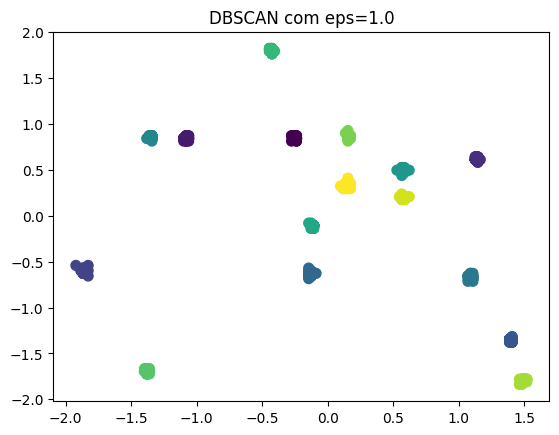

eps: 1.5, Silhouette Score: 0.9906016554646687


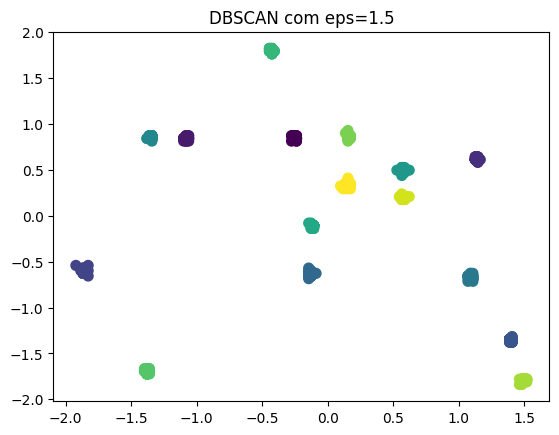

In [93]:
def apply_dbscan(X, eps_range, min_samples):
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = dbscan.labels_
        silhouette_avg = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        print(f'eps: {eps}, Silhouette Score: {silhouette_avg}')
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
        plt.title(f'DBSCAN com eps={eps}')
        plt.show()

apply_dbscan(X1, [0.5, 1.0, 1.5], 5)
apply_dbscan(X2, [0.5, 1.0, 1.5], 5)
apply_dbscan(X3, [0.5, 1.0, 1.5], 5)
apply_dbscan(X4, [0.5, 1.0, 1.5], 5)


Results of the fourth method:
- Dataset 1 -> number of clusters: 2, eps: 1.5, Silhouette Score: 0.7354853119091309
- Dataset 2 -> number of clusters: 1, eps: 0.5, Silhouette Score: -1 / eps: 1.0, Silhouette Score: -1 / eps: 1.5, Silhouette Score: -1
- Dataset 3 -> number of clusters: 7, eps: 0.5, Silhouette Score: 0.9000222187155206 / eps: 1.0, Silhouette Score: 0.9000222187155206 / eps: 1.5, Silhouette Score: 0.9000222187155206
- Dataset 4 -> number of clusters: 16, eps: 1.0, Silhouette Score: 0.9906016554646687 / eps: 1.5, Silhouette Score: 0.9906016554646687

---

### Conclusions

Looking for all methods applied, we have:
##### 1) KMeans with Silhouette Score
- Dataset 1: 2 clusters, Silhouette Score: 0.7354853119091309
- Dataset 2: 2 clusters, Silhouette Score: 0.423756916339722
- Dataset 3: 10 clusters, Silhouette Score: 0.9000222187155206
- Dataset 4: 16 clusters, Silhouette Score: 0.9906016554646687
---
##### 2) Kmeans with Elbow Method
- Dataset 1: 2 clusters
- Dataset 2: 2 clusters
- Dataset 3: 9 clusters
- Dataset 4: 16 clusters
---
##### 3) Hierarchical Clustering
- Dataset 1: Number of clusters: 2, Silhouette Score: 0.7354853119091309
- Dataset 2: Number of clusters: 2, Silhouette Score: 0.423756916339722
- Dataset 3: Number of clusters: 7, Silhouette Score: 0.7619677009454591
- Dataset 4: Number of clusters: 16, Silhouette Score: 0.9906016554646687
---
##### 4) DBSCAN
- Dataset 1 -> number of clusters: 2, eps: 1.5, Silhouette Score: 0.7354853119091309
- Dataset 2 -> number of clusters: 1, eps: 0.5, Silhouette Score: -1 / eps: 1.0, Silhouette Score: -1 / eps: 1.5, Silhouette Score: -1
- Dataset 3 -> number of clusters: 7, eps: 0.5, Silhouette Score: 0.9000222187155206 / eps: 1.0, Silhouette Score: 0.9000222187155206 / eps: 1.5, Silhouette Score: 0.9000222187155206
- Dataset 4 -> number of clusters: 16, eps: 1.0, Silhouette Score: 0.9906016554646687 / eps: 1.5, Silhouette Score: 0.9906016554646687
---
So we can reach the number of clusters by looking the images and the results:
##### Final Decicion
- Dataset 1: 2 clusters
- Dataset 2: 1 cluster
- Dataset 3: 7 clusters
- Dataset 4: 16 clusters